**任务:**
基于task_data.csv数据，建立二阶多项式逻辑回归模型实现异常消费数据预测，与线性逻辑回归模型结果进行对比。
1、建立线性边界的逻辑回归模型，评估模型表现；
2、建立二阶多项式边界的逻辑回归模型，对比其与线性边界的表现
3、预测pay1=70, pay2=20时对应消费是否为异常消费
4、获取边界函数参数、绘制边界函数

In [2]:
#数据加载
import pandas as pd
import numpy as np
data=pd.read_csv('task_data.csv')
data.head()


,pay1,pay2,y
0,2.89,0.06,1
1,10.40,8.78,0
2,14.02,87.76,1
3,104.39,45.72,1
4,80.84,113.05,1


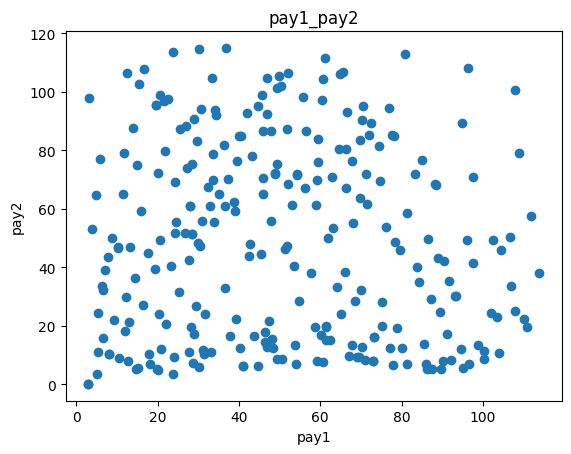

In [4]:
#数据可视化
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.scatter(data.loc[:,'pay1'],data.loc[:,'pay2'])
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.show()

In [5]:
#创建mask筛选变量
mask=data.loc[:,'y']==1
print(mask)

0       True
1      False
2       True
3       True
4       True
       ...  
268     True
269     True
270    False
271    False
272    False
Name: y, Length: 273, dtype: bool


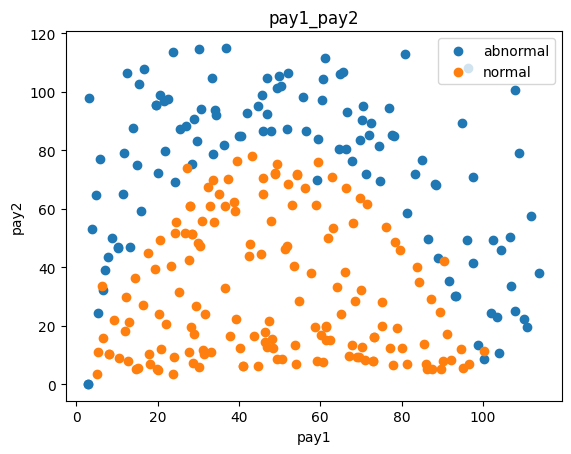

In [10]:
fig2=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [11]:
#X, y 赋值
X=data.drop(['y'],axis=1)
y=data.loc[:,'y']
X.head()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: y, dtype: int64

In [13]:
#格式转化
X=np.array(X)
y=np.array(y)
print(type(X),X.shape)

<class 'numpy.ndarray'> (273, 2)


In [14]:
#建立逻辑回归模型
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression()
print(LR1)

LogisticRegression()


In [15]:
#模型训练
LR1.fit(X,y)

LogisticRegression()

In [16]:
#模型预测
y_predict=LR1.predict(X)
print(y_predict)
print(y)

[0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0]
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1

In [18]:
#计算准确率
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.8021978021978022


In [19]:
#获取边界函数核心参数theta
theta0=LR1.intercept_
theta1,theta2=LR1.coef_[0][0],LR1.coef_[0][1]
print(theta0,theta1,theta2)

[-4.4074176] 0.019854672255383208 0.05843952689925184
